## Import packages

In [1]:
import pandas as pd
from keras.callbacks import EarlyStopping, ModelCheckpoint
from CFModel import CFModel

Using Theano backend.
Using gpu device 0: GRID K520 (CNMeM is disabled, cuDNN 5006)


## Define constants


In [12]:
RATINGS_CSV_FILE = 'ml1m_ratings.csv'
MODEL_WEIGHTS_FILE = 'ml1m_weights.h5'
K_FACTORS = 120
RNG_SEED = 1446557

## Load MovieLens 1M data

In [3]:
ratings = pd.read_csv(RATINGS_CSV_FILE, 
                      sep='\t', 
                      encoding='latin-1', 
                      usecols=['userid', 'movieid', 'user_emb_id', 'movie_emb_id', 'rating'])
max_userid = ratings['userid'].drop_duplicates().max()
max_movieid = ratings['movieid'].drop_duplicates().max()
print len(ratings), 'ratings loaded.'

1000209 ratings loaded.


## Create training set

In [4]:
shuffled_ratings = ratings.sample(frac=1., random_state=RNG_SEED)
Users = shuffled_ratings['user_emb_id'].values
print 'Users:', Users, ', shape =', Users.shape
Movies = shuffled_ratings['movie_emb_id'].values
print 'Movies:', Movies, ', shape =', Movies.shape
Ratings = shuffled_ratings['rating'].values
print 'Ratings:', Ratings, ', shape =', Ratings.shape

Users: [4403 1819 2571 ...,  354 3510  831] , shape = (1000209,)
Movies: [2717 3692  149 ..., 2700 2920 3711] , shape = (1000209,)
Ratings: [5 4 4 ..., 2 4 4] , shape = (1000209,)


## Define model

In [13]:
model = CFModel(max_userid, max_movieid, K_FACTORS)
model.compile(loss='mse', optimizer='adamax')

## Train model

In [14]:
callbacks = [EarlyStopping('val_loss', patience=2), 
             ModelCheckpoint(MODEL_WEIGHTS_FILE, save_best_only=True)]
model.fit([Users, Movies], Ratings, nb_epoch=30, validation_split=.1, verbose=2, callbacks=callbacks)

Train on 900188 samples, validate on 100021 samples
Epoch 1/30
71s - loss: 8.0224 - val_loss: 2.1092
Epoch 2/30
71s - loss: 1.3997 - val_loss: 1.0811
Epoch 3/30
72s - loss: 0.9686 - val_loss: 0.9162
Epoch 4/30
72s - loss: 0.8678 - val_loss: 0.8583
Epoch 5/30
72s - loss: 0.8210 - val_loss: 0.8273
Epoch 6/30
72s - loss: 0.7894 - val_loss: 0.8067
Epoch 7/30
71s - loss: 0.7638 - val_loss: 0.7914
Epoch 8/30
71s - loss: 0.7405 - val_loss: 0.7802
Epoch 9/30
72s - loss: 0.7182 - val_loss: 0.7707
Epoch 10/30
72s - loss: 0.6958 - val_loss: 0.7605
Epoch 11/30
71s - loss: 0.6729 - val_loss: 0.7536
Epoch 12/30
70s - loss: 0.6493 - val_loss: 0.7496
Epoch 13/30
70s - loss: 0.6252 - val_loss: 0.7457
Epoch 14/30
70s - loss: 0.6009 - val_loss: 0.7435
Epoch 15/30
70s - loss: 0.5764 - val_loss: 0.7436
Epoch 16/30
70s - loss: 0.5521 - val_loss: 0.7465
Epoch 17/30
70s - loss: 0.5283 - val_loss: 0.7487


In [15]:
import math
print 'RMSE at Epoch 15 =', '{:.4f}'.format(math.sqrt(0.7435))

RMSE at Epoch 15 = 0.8623


In [37]:
loss = pd.DataFrame({'epoch': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17],
 'training': [8.0224,1.3997,0.9686,0.8678,0.8210,0.7894,0.7638,0.7405,0.7182,0.6958,0.6729,0.6493,0.6252,0.6009,0.5764,0.5521,0.5283],
 'validation': [2.1092,1.0811,0.9162,0.8583,0.8273,0.8067,0.7914,0.7802,0.7707,0.7605,0.7536,0.7496,0.7457,0.7435,0.7436,0.7465,0.7487]})

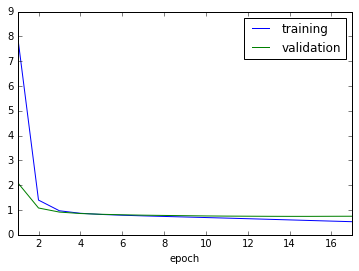

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
loss.ix[:,:].plot(x='epoch')